## Contribution of group members

All members peformed joint work  and thus contributed equally .

Tanya D Vyas (23510124) -   25%

Tarun Kumar (23510125) -      25 %

Tharasinh Katravath (23510126) -      25%

Tiyasha Khatua (23510128) -    25 %

## Time-Domain Schrodinger equation (TDSE)
### Scattering from a 'cliff' potential

In atomic units (a.u.) , the time domain schrodinger equation in 1D is given by

$$
i \, \frac{\partial \psi(x, t)}{\partial t}
= -\frac{1}{2} \frac{\partial^2 \psi(x, t)}{\partial x^2} + V(x, t) \; \psi(x, t)
$$

Note that:
* all distances $x$ are now in units of the Bohr radius $a_0 = 5.29\times 10^{-11} \; \text{m}$
* all energies (kinetic, potential, etc.) are in units of $E_0 = 27.2 \; \text{eV}$
* time $t$ is in units of $\hbar/E_0 = 2.42 \times 10^{-17} \; \text{s}$

#### The problem

Time-evolution of a wavepacket: Given the 'initial' wavefunction $\psi(x, t=0)$ at all $a \leq x \leq b$ describing a quantum mechanical system prepared at $t=0$, we would like to know $\psi(x, t)$ at later times $t > 0$. In particular, study the scattering from a cliff potential.

#### Reducing the TDSE to Initial Value Problem

We discretize the spatial domain $a \leq x \leq b$ to a uniform grid of $N$ points: $(a, a+\Delta x,a+2\Delta x, \cdots, x_{j-1}, x_j, x_{j+1}, \cdots, b-2\Delta x, b-\Delta x, b]$.

At any given grid point $x_j$ in space, we can use the finite difference to approximately calculate the second-order differential operator $\frac{\partial^2 \psi(x, t)}{\partial x^2} |_{x_j}$ on the RHS of the TDSE:

$$
\frac{\partial^2 \psi(x_j, t)}{\partial x^2} \simeq
        \frac{1}{\Delta x^2} \left [ \psi(x_j+\Delta x, t) - 2 \; \psi(x_j, t) + \psi(x_j -\Delta x, t)\right ]
$$

Further compacting the notation by denoting $\psi(x_j, t) \rightarrow \psi_j(t)$, the TDSE can be written down as a system of $N$ ODEs:
$$
\frac{\partial \psi_j(t)}{\partial t} =
    -\frac{i}{2 \Delta x^2} \left [ \psi_{j+1}(t) - 2 \; \psi_j(t) + \psi_{j-1}(t)\right ]  
    + V_j(t) \; \psi_j(t)
$$


#### Integrating the set of ODEs

We need to consider that the TDSE preserves the normalization of the wavefunction. so an ODE solver that preserves the norm should be used. The Leapfrog method has this special property.

To make it suitable for leapfroG integration, we need to separate the wavefunction $\psi_j(t)$ into its real and imaginary parts:
$$
\psi_j(t) = R_j(t) + i \, I_j(t).
$$

Substituion leads to the following set of coupled ODEs:
\begin{eqnarray}
\frac{dR_j}{dt} &=& -\frac{1}{2\Delta x^2}I_{j-1} + \left ( \frac{1}{\Delta x^2} + V_j \right ) I_j
                    - \frac{1}{2 \Delta x^2} I_{j+1} \\
\frac{dI_j}{dt} &=& \frac{1}{2\Delta x^2}R_{j-1} - \left ( \frac{1}{\Delta x^2} + V_j \right ) R_j
                    + \frac{1}{2 \Delta x^2} R_{j+1} \\           
\end{eqnarray}

As discussed in class, the above set of coupled ODEs can be compared to the set of differential equations for a Hamiltonian system and one can think of $R_j$'s as 'generalized coordinates', and $I_j$'s as the 'generalized velocities'. As such, by the same analogy, $R^T R + I^T I$ must be preserved at all times. In fact this is integrand of the wavefunction normalization!

#### Leap-Frog Integration

\begin{eqnarray}
I_j {(t + \Delta t/2)} &=& I_j (t) + \left [ {dI_j}/{dt} \right ]_{R_j(t)} \times \Delta t/2  \\
R_j {(t + \Delta t)} &=& R_j (t) + \left [ dR_j/dt \right ]_{I_j{(t + \Delta t/2)}} \times \Delta t \\
I_j {(t + \Delta t)} &=& I_j {(t + \Delta t/2)} + \left [ dI/dt \right ]_{R_j(t + \Delta t)} \times \Delta t/2
\end{eqnarray}




## 5 point stensil


f' = $\frac{f(x+2h) + 8f(x+h) -8f(x+h) + f(x-2h)}{12h}$

f" = $\frac{f - f(x+2h) + 16f(x+h)-30f(x) + 16f(x-h) - f(x-2h)}{12h^2}$

$\frac{d^2\psi_j}{dx^2}=\frac{-\psi_{j+1}-16\psi_{j+1}-30\psi_j + 16\psi_{j-1}-\psi_{j-2}}{12h^2}$

$\frac{d\psi_j}{dt} =\frac{i}{24h^2}[-\psi_{j+2}+16\psi{j+1}-30\psi_{j-1}\psi_{j-2}]-iV_j\psi_j$

$\psi_j(t) = R_j(t) + iI_j(t)$

$\frac{dR_j}{dt} = \frac{I_(j+2)}{24h^2} - \frac{16I_{j+1}}{24h^2} + [\frac{30}{24h^2} + V_j]I_j - \frac{16I_{j-1}}{24h^2} + \frac{I_{j-2}}{24h^2}$

$\frac{dI_j}{dt}=\frac{-1}{24h^2}R_{j+2}+\frac{16}{24h^2}I_{j+1}-[\frac{30}{24h^2}+V_j]R_j+\frac{16}{24h^2}R_{j-1}-\frac{1}{24h^2}R_{j-2}$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

%matplotlib inline

def dIdt(R, Vx, dx):
    #-- Calculate and return dI/dt at all x_j (assume periodic bndry for wavefunction)
    #-- Equation 8.8b (Wang)
    b = 0.5/(dx**2.)

    dydt = b*np.roll(R, 1)
    dydt += -(2*b + Vx)*R
    dydt += b*np.roll(R, -1)

    return dydt

In [2]:
def dIdt(R, Vx, dx):
    # Calculate and return dI/dt at all x_j using a five-point stencil
    b = 1.0 / (24 * dx**2)
    
    dydt = -b*np.roll(R,2)
    dydt += 16*b*np.roll(R,1)
    dydt += -(30*b + Vx)*R
    dydt += 16*b*np.roll(R,-1)
    dydt += -b*np.roll(R,-2)

    return dydt

def dRdt(I, Vx, dx):
    #-- Calculate and return dR/dt at all x_j (assume periodic bndry for wavefunction)
    #-- Equation 8.8a (Wang)

    b = 0.5/(dx**2.)

    dydt = -b*np.roll(I, 1)
    dydt += (2*b + Vx)*I
    dydt += -b*np.roll(I, -1)

    return dydt

In [3]:


def dRdt(I, Vx, dx):
    # Calculate and return dR/dt at all x_j using a five-point stencil
    b = 1.0 / (24 * dx**2)
    
    dydt = b*np.roll(I,2)
    dydt += -16*b*np.roll(I,1)
    dydt += (30*b + Vx)*I
    dydt += -16*b*np.roll(I,-1)
    dydt += b*np.roll(I,-2)

    return dydt


In [4]:
#-- position expectation value.
def avg_x(x, psi):
    dx = x[1]-x[0]
    xPsi = x*psi
    return np.real(integrate.simps(psi.conjugate()* xPsi, x))


#-- momentum expectation value.
def avg_P(x, R, I):
    # Can be shown that: <p> = \hbar \int (RI' - IR') dx
    dx = x[1] - x[0]

    #-- central difference for derivatives (assume periodic bndry for wavefunction)
    dRdx = (0.5/dx)*(np.roll(R, -1) - np.roll(R, 1))
    dIdx = (0.5/dx)*(np.roll(I, -1) - np.roll(I, 1))

    return (integrate.simps(R*dIdx - I*dRdx, x))

In [5]:
#-- momentum expectation value.
def avg_P(x, R, I):
    # Can be shown that: <p> = \hbar \int (RI' - IR') dx
    dx = x[1] - x[0]

    #-- central difference for derivatives (assume periodic bndry for wavefunction)
    dRdx = (1.0/(12*dx))*(np.roll(R, -2)-8*np.roll(R,-1) +8*np.roll(R,1) - np.roll(R, 2))
    dIdx = (1.0/(12*dx))*(np.roll(I, -2)-8*np.roll(I,-1) +8*np.roll(I,1) - np.roll(I, 2))

    return (integrate.simps(R*dIdx - I*dRdx, x))

#### Scattering 'cliff' potential

In [6]:
@np.vectorize
#-- cliff potential at x=1.0
def V(x):
    if x>1.0:
        return -7.5e4
    else:
        return 0

In [7]:
# @np.vectorize
# #-- zero
# def V(x):
#     return 0

In [8]:
# def V(x):
#     return x**2/2

#### Initial wavepacket at t=0

$$
\psi(x, t=0) = \left ( \frac{1}{\sigma \sqrt{2\pi}} \right )^{1/2} \exp \left [ -(x-x_0)^2 / 4\sigma^2 + i k_0 x \right ]
$$


In [11]:
xa = -8.
xb = 8.

#-- wavefunction at t=0
sigma = 0.5*np.sqrt(0.001)
x0 = 0.0
k0 = 400.0

dx = sigma/18.
x = np.arange(xa, xb+dx, dx)
print (len(x))
Vx = V(x)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))

18216
At t=0, dx = 8.784105e-04, k0 = 400.00, <p> = -399.787, <x> = -0.00


### Plot the initial wave packet

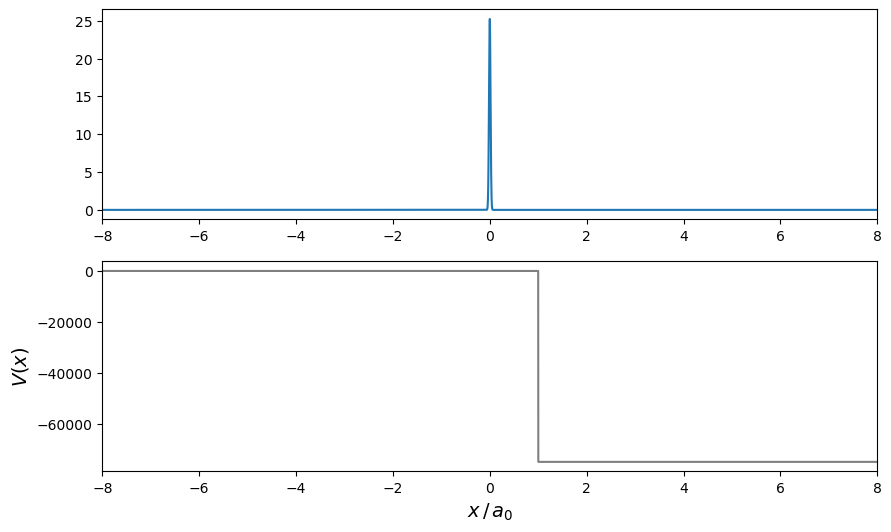

In [12]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(x, np.abs(psi0)**2)
plt.xlim(xa, xb)

plt.subplot(2,1,2)
plt.plot(x, V(x), '-', color='gray')
plt.xlabel(r'$x \, / \, a_0$', fontsize=14)
plt.ylabel(r'$V(x)$', fontsize=14)

plt.xlim(xa, xb)
plt.show()

#### Leap-frog integration

In [14]:
from numpy import transpose

dt = 0.5*(dx**2)
Nt =  25000      # time-steps to integrate over
print('dx = %.4e, dt = %.4e, integrating for %d time=steps'%(dx, dt, Nt))

tfrac = 0.05
Nplots = int(1./tfrac)
psi_t = np.empty((Nplots, len(x)), dtype='complex')

j = 0
for i in range(1, Nt+1):

    I_half = I + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t/2)
    R = R + dRdt(I_half, Vx, dx) * dt       #-- R(t + delta_t)
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t)

    if ((i % int(tfrac*Nt)) == 0):
        print('Storing snapshot %2d/%2d of the complex wavefunction '%(j+1, Nplots))
        psi_t[j,:] = R + 1j*I
        print("The product of matrices = ",np.dot(R,transpose(R))+np.dot(I,transpose(I)))
        
        j = j+1 #-- prepare for next snapshot

dx = 8.7841e-04, dt = 3.8580e-07, integrating for 25000 time=steps
Storing snapshot  1/20 of the complex wavefunction 
The product of matrices =  1138.4199767509226
Storing snapshot  2/20 of the complex wavefunction 
The product of matrices =  1138.4199767509235
Storing snapshot  3/20 of the complex wavefunction 
The product of matrices =  1138.4199767509244
Storing snapshot  4/20 of the complex wavefunction 
The product of matrices =  1138.4199580263312
Storing snapshot  5/20 of the complex wavefunction 
The product of matrices =  1138.4128993118466
Storing snapshot  6/20 of the complex wavefunction 
The product of matrices =  1138.4193361537386
Storing snapshot  7/20 of the complex wavefunction 
The product of matrices =  1138.4199633038115
Storing snapshot  8/20 of the complex wavefunction 
The product of matrices =  1138.4199766388397
Storing snapshot  9/20 of the complex wavefunction 
The product of matrices =  1138.4199767508162
Storing snapshot 10/20 of the complex wavefunction 

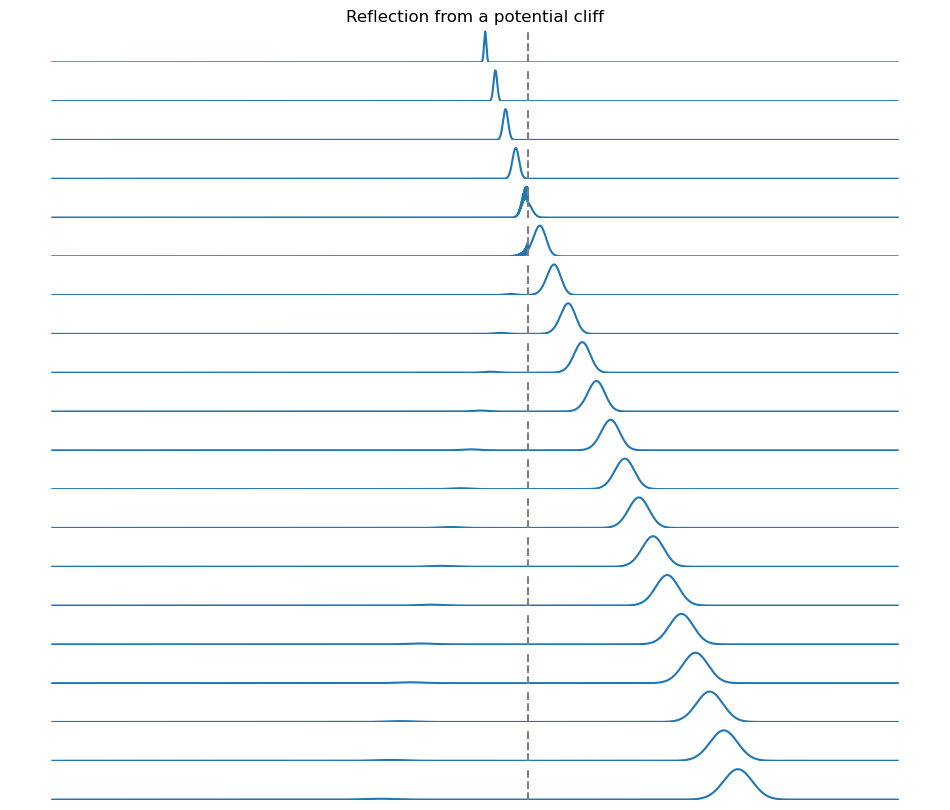

In [15]:
#-- Plot the wavefunctions psi(x, t) recorded at different instances
plt.figure(figsize=(12,10))

for j in range(Nplots):
    ax = plt.subplot(Nplots, 1, j+1)

    #-- remove all axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi_t[j,:])**2))
    #ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi0)**2))

    #-- set the title for the first subplot
    if (j==0):
        plt.title('Reflection from a potential cliff')

    #-- plot |psi(t)|^2
    ax.plot(x, np.abs(psi_t[j,:])**2)

    #-- mark the position of the cliff
    ax.axvline(1.0, ls='--', color='gray')
    #ax.axvline(1.5, ls='--', color='gray')


plt.show()

In [20]:
import numpy as np

def generate_A_matrix(N, dx, Vx):
    
    # Calculate coefficients
    a = 30 / (24 * dx**2) + Vx
    b = -16 / (24 * dx**2)
    c = 1 / (24 * dx**2)
    
    # Create the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        A[i, i] = a[i]
        if i > 0:
            A[i, i-1] = b
            A[i-1, i] = b
        if i > 1:
            A[i, i-2] = c
            A[i-2, i] = c
    
    return A

@np.vectorize
#-- cliff potential at x=1.0
def V(x):
    if x>1.0:
        return -7.5e4
    else:
        return 0
xa = -4.
xb = 8.

#-- wavefunction at t=0
sigma = 0.5*np.sqrt(0.001)
x0 = 0.0
k0 = 400.0

dx = sigma/18.
x = np.arange(xa, xb+dx, dx)
print (len(x))
Vx = V(x)
N = len(x)  # Number of spatial grid points

# Generate the matrix A
A = generate_A_matrix(N, dx, Vx)

# Print the matrix A
print("Matrix A:")
print(A)


13663
Matrix A:
[[1620000. -864000.   54000. ...       0.       0.       0.]
 [-864000. 1620000. -864000. ...       0.       0.       0.]
 [  54000. -864000. 1620000. ...       0.       0.       0.]
 ...
 [      0.       0.       0. ... 1545000. -864000.   54000.]
 [      0.       0.       0. ... -864000. 1545000. -864000.]
 [      0.       0.       0. ...   54000. -864000. 1545000.]]


### HARMONIC OSCILLATOR

In [21]:
def V(x):
    return x**2/2

In [22]:
xa = -10.
xb = 10.

#-- wavefunction at t=0
sigma = 0.5
x0 = -3
k0=0
#k0 = 0

dx = 0.04
x = np.arange(xa, xb+dx, dx)
print (len(x))
Vx = V(x)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))

501
At t=0, dx = 4.000000e-02, k0 = 0.00, <p> = 0.000, <x> = -3.00


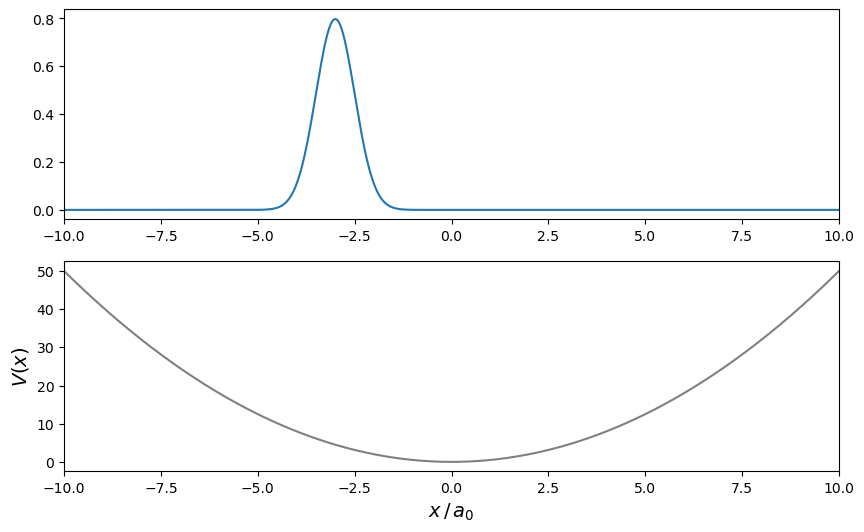

In [23]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(x, np.abs(psi0)**2)
plt.xlim(xa, xb)

plt.subplot(2,1,2)
plt.plot(x, V(x), '-', color='gray')
plt.xlabel(r'$x \, / \, a_0$', fontsize=14)
plt.ylabel(r'$V(x)$', fontsize=14)

plt.xlim(xa, xb)
plt.show()

In [24]:
from numpy import transpose

dt = 0.5*(dx**2)
Nt =  25000      # time-steps to integrate over
print('dx = %.4e, dt = %.4e, integrating for %d time=steps'%(dx, dt, Nt))

tfrac = 0.05
Nplots = int(1./tfrac)
psi_t = np.empty((Nplots, len(x)), dtype='complex')

j = 0
for i in range(1, Nt+1):

    I_half = I + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t/2)
    R = R + dRdt(I_half, Vx, dx) * dt       #-- R(t + delta_t)
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)  #-- I(t + delta_t)

    if ((i % int(tfrac*Nt)) == 0):
        print('Storing snapshot %2d/%2d of the complex wavefunction '%(j+1, Nplots))
        psi_t[j,:] = R + 1j*I
        print("The product of matrices = ",np.dot(R,transpose(R))+np.dot(I,transpose(I)))
        
        j = j+1 #-- prepare for next snapshot

dx = 4.0000e-02, dt = 8.0000e-04, integrating for 25000 time=steps
Storing snapshot  1/20 of the complex wavefunction 
The product of matrices =  24.999942571942253
Storing snapshot  2/20 of the complex wavefunction 
The product of matrices =  24.99994239522475
Storing snapshot  3/20 of the complex wavefunction 
The product of matrices =  24.999949562800612
Storing snapshot  4/20 of the complex wavefunction 
The product of matrices =  24.999942982755506
Storing snapshot  5/20 of the complex wavefunction 
The product of matrices =  24.99994240674299
Storing snapshot  6/20 of the complex wavefunction 
The product of matrices =  24.999903093523198
Storing snapshot  7/20 of the complex wavefunction 
The product of matrices =  24.9999384016012
Storing snapshot  8/20 of the complex wavefunction 
The product of matrices =  24.99994240624727
Storing snapshot  9/20 of the complex wavefunction 
The product of matrices =  24.99993172168469
Storing snapshot 10/20 of the complex wavefunction 
The p

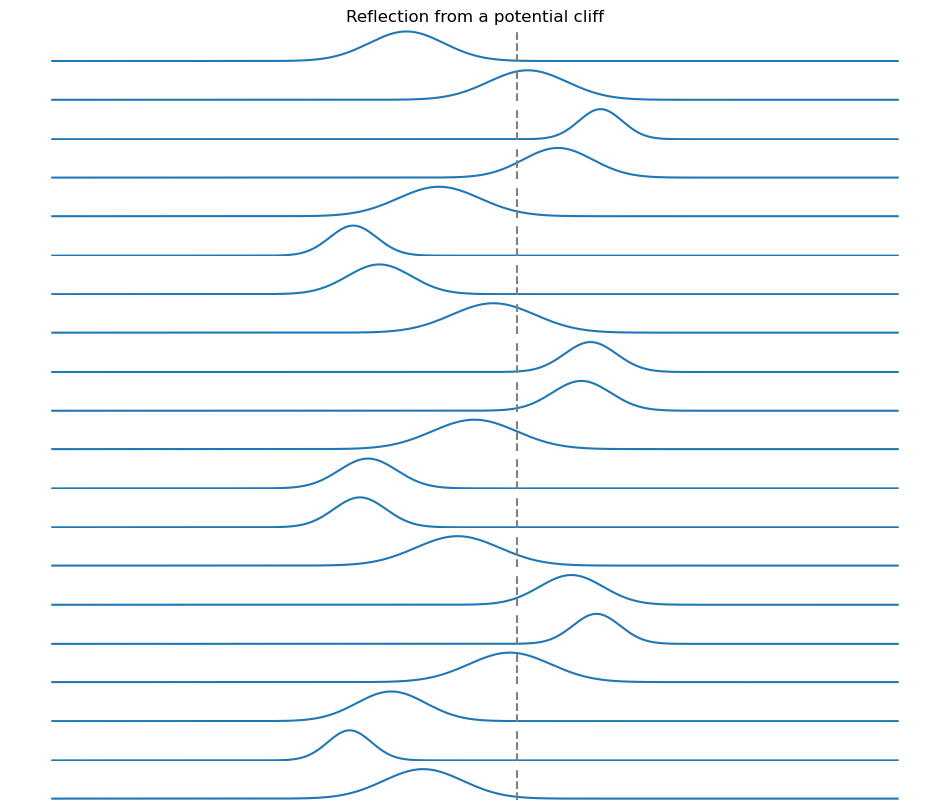

In [25]:
#-- Plot the wavefunctions psi(x, t) recorded at different instances
plt.figure(figsize=(12,10))

for j in range(Nplots):
    ax = plt.subplot(Nplots, 1, j+1)

    #-- remove all axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi_t[j,:])**2))
    #ax.set_ylim(-0.02, 1.05*np.max(np.abs(psi0)**2))

    #-- set the title for the first subplot
    if (j==0):
        plt.title('Reflection from a potential cliff')

    #-- plot |psi(t)|^2
    ax.plot(x, np.abs(psi_t[j,:])**2)

    #-- mark the position of the cliff
    ax.axvline(1.0, ls='--', color='gray')
    #ax.axvline(1.5, ls='--', color='gray')


plt.show()

In [26]:
import numpy as np

def generate_A_matrix(N, dx, Vx):
    
    # Calculate coefficients
    a = 30 / (24 * dx**2) + Vx
    b = -16 / (24 * dx**2)
    c = 1 / (24 * dx**2)
    
    # Create the matrix A
    A = np.zeros((N, N))
    for i in range(N):
        A[i, i] = a[i]
        if i > 0:
            A[i, i-1] = b
            A[i-1, i] = b
        if i > 1:
            A[i, i-2] = c
            A[i-2, i] = c
    
    return A

def V(x):
    # Example potential function, replace with actual implementation
    return 0.5 * x**2

xa = -10
xb = 10.

#-- wavefunction at t=0
sigma = 0.5
x0 = -3
k0 = 0

dx = 0.04
x = np.arange(xa, xb+dx, dx)
Vx = V(x)
N = len(x)  # Number of spatial grid points

# Generate the matrix A
A = generate_A_matrix(N, dx, Vx)

# Print the matrix A
print("Matrix A:")
print(A)


Matrix A:
[[ 831.25       -416.66666667   26.04166667 ...    0.
     0.            0.        ]
 [-416.66666667  830.8508     -416.66666667 ...    0.
     0.            0.        ]
 [  26.04166667 -416.66666667  830.4532     ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  830.4532
  -416.66666667   26.04166667]
 [   0.            0.            0.         ... -416.66666667
   830.8508     -416.66666667]
 [   0.            0.            0.         ...   26.04166667
  -416.66666667  831.25      ]]


From the calculations of five point stencil the values of a , b , c are

$a=\frac{30}{24h^2}+V_j$

$b=\frac{-16}{24h^2}$

$ic=\frac{1}{24h^2}$

$$
A = \begin{bmatrix}
a_1 & b & c & 0 & \cdots & \cdots & 0 \\
b & a_2 & b & c & 0 & \cdots & 0 \\
c & b & a_3 & b & c & 0 & 0 \\
0 & c & b & a_4 & b & c & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & 0 & c & b & a_{N-1} \\
0 & \cdots & \cdots & \cdots & 0 & c & a_N
\end{bmatrix}
$$


$$
A = \begin{bmatrix}
831.25 & -416.66 & 26.041 & 0 & \cdots & \cdots & 0 \\
-416.66 & 830.85 & -416.66 & 26.041 & 0 & \cdots & 0 \\
26.041 & -416.66 & 830.453 & -416.66 & 26.041 & 0 & 0 \\
0 & 26.041 & -416.66 & 831.25 & -416.66 & 26.041 & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & 0 & 26.041 & -416.66 & a_{N-1} \\
0 & \cdots & \cdots & \cdots & 0 & 26.041 & 831.25
\end{bmatrix}
$$

## Matrix Method

$$
A =  \begin{bmatrix}
\left(\dfrac{30}{24 dx^2}+V(x)\right) & -\dfrac{16}{24 dx^2} & \dfrac{1}{24 dx^2} & 0  & \cdots & \cdots & 0 \\
\dfrac{-16}{24 dx^2} & \left(\dfrac{30}{24 dx^2}+V(x)\right) & \dfrac{-16}{24 dx^2} & \dfrac{1}{24 dx^2} & 0 & \cdots & 0 \\
\dfrac{1}{24 dx^2} & \dfrac{-16}{24 dx^2} & \left(\dfrac{30}{24 dx^2}+V(x)\right) & \dfrac{-16}{24 dx^2} & \dfrac{1}{24 dx^2} & 0 & 0 \\
0 & \dfrac{1}{24 dx^2} & \dfrac{-16}{24 dx^2} & \left(\dfrac{30}{24 dx^2}+V(x)\right) & \dfrac{-16}{24 dx^2} &\dfrac{1}{24 dx^2} & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & 0 & \ddots & \ddots & \ddots \\
\end{bmatrix}
$$

In [27]:
xa = -10.
xb = 10.

#-- wavefunction at t=0
sigma = 0.5
x0 = -3
k0 = 0

dx = 0.04
x = np.arange(xa, xb+dx, dx)
print (len(x))
Vx = V(x)

psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

print('At t=0, dx = %.6e, k0 = %.2f, <p> = %.3f, <x> = %.2f'%
      (dx, k0, avg_P(x, R, I), avg_x(x, psi0) ))

501
At t=0, dx = 4.000000e-02, k0 = 0.00, <p> = 0.000, <x> = -3.00


### norm of the wave packet is constant

In [28]:
#-- add psi0 to the top of the stack of \psi(t)
psi_t = np.vstack((psi0, psi_t))

for j in range(len(psi_t)):
    norm = integrate.simps(np.abs(psi_t[j,:])**2, x)
    avgX = avg_x(x, np.real(psi_t[j,:]) + 1j*np.imag(psi_t[j,:]))
    avgP = avg_P(x, np.real(psi_t[j,:]), np.imag(psi_t[j,:]))

    print ('%2d \t norm = %.2e <x> = %.3e, <p> = %4.2f'%(j+1, norm, avgX, avgP))

 1 	 norm = 1.00e+00 <x> = -3.000e+00, <p> = 0.00
 2 	 norm = 1.00e+00 <x> = -1.621e+00, <p> = -2.52
 3 	 norm = 1.00e+00 <x> = 1.248e+00, <p> = -2.73
 4 	 norm = 1.00e+00 <x> = 2.970e+00, <p> = -0.42
 5 	 norm = 1.00e+00 <x> = 1.961e+00, <p> = 2.27
 6 	 norm = 1.00e+00 <x> = -8.510e-01, <p> = 2.88
 7 	 norm = 1.00e+00 <x> = -2.880e+00, <p> = 0.84
 8 	 norm = 1.00e+00 <x> = -2.262e+00, <p> = -1.97
 9 	 norm = 1.00e+00 <x> = 4.365e-01, <p> = -2.97
10 	 norm = 1.00e+00 <x> = 2.733e+00, <p> = -1.24
11 	 norm = 1.00e+00 <x> = 2.517e+00, <p> = 1.63
12 	 norm = 1.00e+00 <x> = -1.325e-02, <p> = 3.00
13 	 norm = 1.00e+00 <x> = -2.532e+00, <p> = 1.61
14 	 norm = 1.00e+00 <x> = -2.722e+00, <p> = -1.26
15 	 norm = 1.00e+00 <x> = -4.102e-01, <p> = -2.97
16 	 norm = 1.00e+00 <x> = 2.279e+00, <p> = -1.95
17 	 norm = 1.00e+00 <x> = 2.873e+00, <p> = 0.86
18 	 norm = 1.00e+00 <x> = 8.255e-01, <p> = 2.88
19 	 norm = 1.00e+00 <x> = -1.981e+00, <p> = 2.25
20 	 norm = 1.00e+00 <x> = -2.966e+00, <p> = -0.45

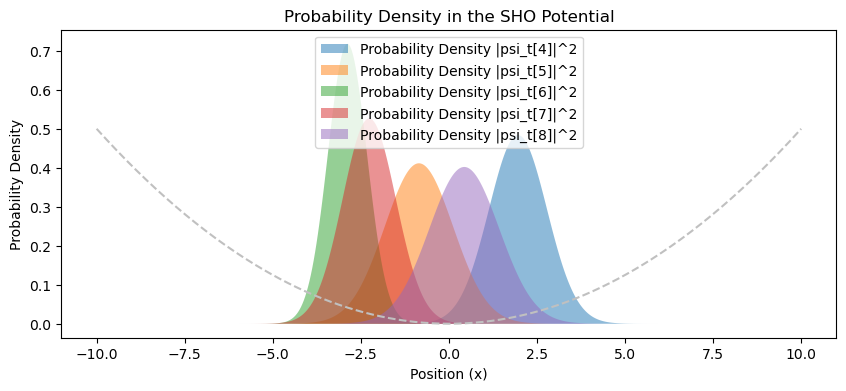

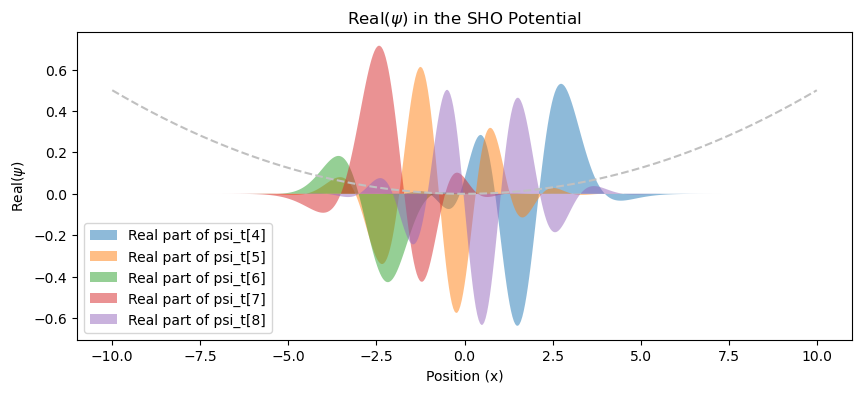

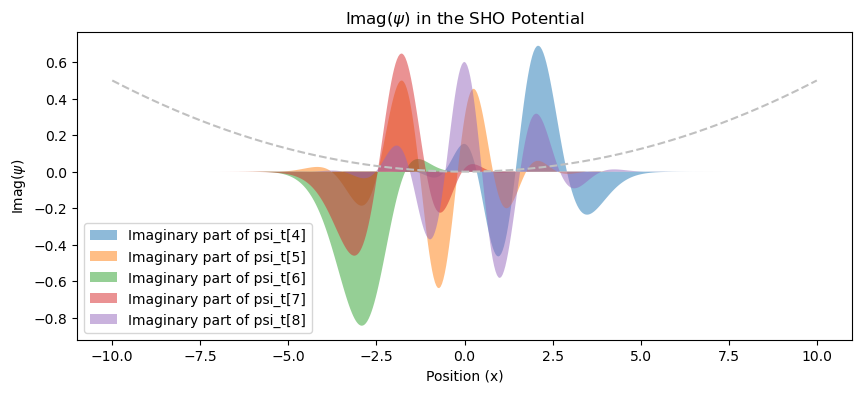

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of time steps
num_time_steps = len(psi_t)

# Plot probability density for each time step
plt.figure(figsize=(10, 4))
plt.plot(x, V(x)/1e2, ls="--", color='silver')
for i in range(4, 9):
    plt.fill_between(x, 0, np.abs(psi_t[i])**2, alpha=0.5, label=f'Probability Density |psi_t[{i}]|^2')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.title('Probability Density in the SHO Potential')
plt.legend()
plt.show()

# Plot real part of the wavefunction for each time step
plt.figure(figsize=(10, 4))
plt.plot(x, V(x)/1e2, ls="--", color='silver')
for i in range(4, 9):
    plt.fill_between(x, 0, np.real(psi_t[i]), alpha=0.5, label=f'Real part of psi_t[{i}]')
plt.xlabel('Position (x)')
plt.ylabel('Real($\psi$)')
plt.title('Real($\psi$) in the SHO Potential')
plt.legend()
plt.show()

# Plot imaginary part of the wavefunction for each time step
plt.figure(figsize=(10, 4))
plt.plot(x, V(x)/1e2, ls="--", color='silver')
for i in range(4, 9):
    plt.fill_between(x, 0, np.imag(psi_t[i]), alpha=0.5, label=f'Imaginary part of psi_t[{i}]')
plt.xlabel('Position (x)')
plt.ylabel('Imag($\psi$)')
plt.title('Imag($\psi$) in the SHO Potential')
plt.legend()
plt.show()


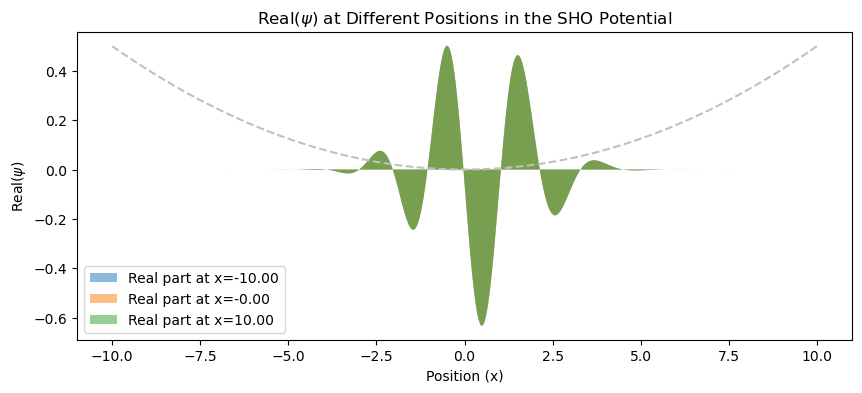

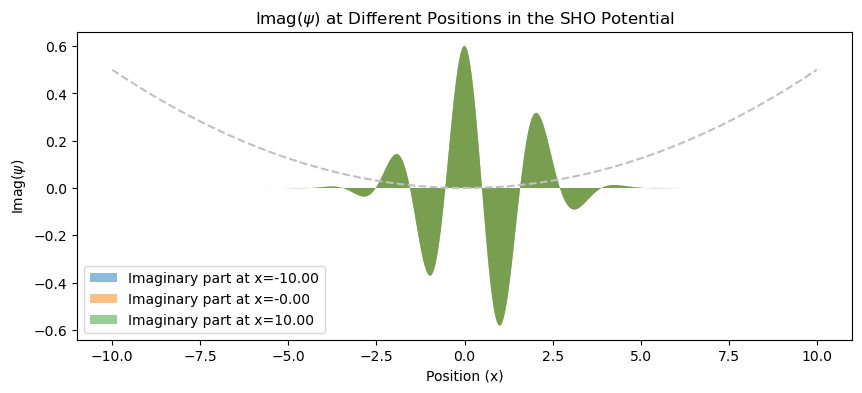

In [38]:
# Define positions of interest (left end, center, right end)
positions_of_interest = [x[0], np.mean(x), x[-1]]

# Find indices of these positions
indices_of_interest = [np.argmin(np.abs(x - position)) for position in positions_of_interest]

# Plot real part of the wavefunction at positions of interest
plt.figure(figsize=(10, 4))
plt.plot(x, V(x)/1e2, ls="--", color='silver')
for index in indices_of_interest:
    plt.fill_between(x, 0, np.real(psi_t[i]), alpha=0.5, label=f'Real part at x={x[index]:.2f}')
plt.xlabel('Position (x)')
plt.ylabel('Real($\psi$)')
plt.title('Real($\psi$) at Different Positions in the SHO Potential')
plt.legend()
plt.show()

# Plot imaginary part of the wavefunction at positions of interest
plt.figure(figsize=(10, 4))
plt.plot(x, V(x)/1e2, ls="--", color='silver')
for index in indices_of_interest:
    plt.fill_between(x, 0, np.imag(psi_t[i]), alpha=0.5, label=f'Imaginary part at x={x[index]:.2f}')
plt.xlabel('Position (x)')
plt.ylabel('Imag($\psi$)')
plt.title('Imag($\psi$) at Different Positions in the SHO Potential')
plt.legend()
plt.show()


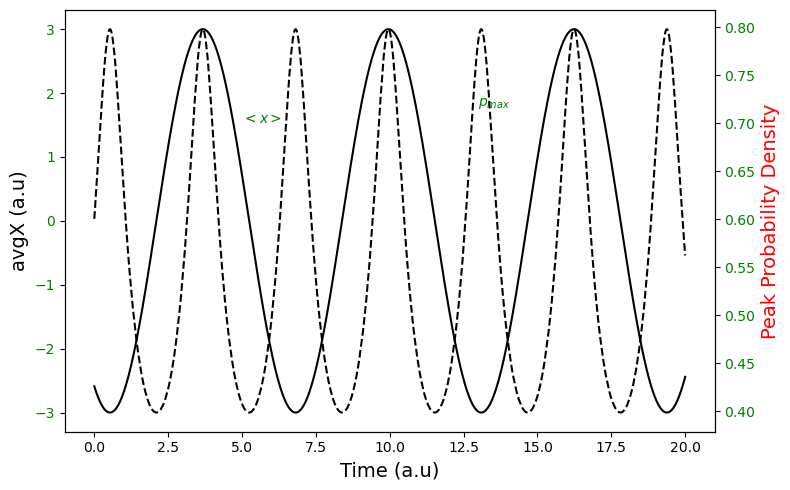

In [36]:
# Initialize arrays to store the expectation values of position and peak probabilities
avgX = np.zeros(Nt)
peak_probability = np.zeros(Nt)

# Defining the time points
time_points = np.linspace(0, 20, Nt)

# time evolution
for i in range(Nt):
    I_half = I + dIdt(R, Vx, dx) * (dt/2.)
    R = R + dRdt(I_half, Vx, dx) * dt
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)
    wavefunction = R + 1j*I
    avgX[i] = avg_x(x, wavefunction)
    peak_probability[i] = np.max(np.abs(wavefunction)**2)

# Plot the results
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_xlabel('Time (a.u)', color="k", fontsize=14)
ax1.set_ylabel('avgX (a.u)', color="k", fontsize=14)
ax1.plot(time_points, avgX, label='Average Position', color='black')
ax1.tick_params(axis='y', labelcolor='green')
ax1.text(13, 1.8, "$p_{max}$", color="green")
ax2 = ax1.twinx()
ax2.set_ylabel('Peak Probability Density', fontsize=14, color="red")
ax2.plot(time_points, peak_probability, label='Peak Probability Density', linestyle='--', color='black')
ax2.tick_params(axis='y', labelcolor='green')
ax2.text(5.0, 0.70, "$<x>$", color="green")
fig.tight_layout()
plt.show()


### iske aage markdown nhi karne ka

In [122]:
import numpy as np
from scipy import integrate

# Define the potential function
def V(x):
    return x**2/2

# Define functions for the time derivatives of position and momentum
def d_avg_x_dt(x, R, I, dx):
    # Calculate the time derivative of the expectation value of position
    dx_dt = 1.0 / (24 * dx**2)
    dx_dt *= np.roll(R,2) - 16*np.roll(R,1) + 30*R - 16*np.roll(R,-1) + np.roll(R,-2)
    dx_dt = integrate.simps(I * dx_dt, x)
    return dx_dt

def d_avg_p_dt(x, R, I, dx, Vx):
    # Calculate the time derivative of the expectation value of momentum
    dp_dt = -1.0 / (24 * dx**2)
    dp_dt *= np.roll(I,2) - 16*np.roll(I,1) + 30*I - 16*np.roll(I,-1) + np.roll(I,-2)
    dp_dt = integrate.simps(R * dp_dt, x) - integrate.simps(I * Vx, x)
    return dp_dt

# Define simulation parameters and initial wavefunction
xa = -10.
xb = 10.
sigma = 0.5
x0 = -3
k0 = 0
dx = 0.04
x = np.arange(xa, xb+dx, dx)
Vx = V(x)
psi0 = 1./np.sqrt(sigma * np.sqrt(2*np.pi))* np.exp( -((x-x0)**2.)/(4.*sigma**2.) + 1j*k0*x )
R = np.real(psi0)
I = np.imag(psi0)

# Time evolution parameters
dt = 0.5*(dx**2)
Nt = 25000

# Arrays to store the expectation values over time
avg_x_values = np.zeros(Nt)
avg_p_values = np.zeros(Nt)

# Perform the time evolution
for i in range(Nt):
    I_half = I + dIdt(R, Vx, dx) * (dt/2.)
    R = R + dRdt(I_half, Vx, dx) * dt
    I = I_half + dIdt(R, Vx, dx) * (dt/2.)
    wavefunction = R + 1j*I
    avg_x_values[i] = avg_x(x, wavefunction)
    avg_p_values[i] = avg_P(x, R, I)

# Calculate the time derivatives
d_avg_x_dt_values = np.gradient(avg_x_values, dt)
d_avg_p_dt_values = np.gradient(avg_p_values, dt)

# Calculate the expectation value of the derivative of the potential
dV_dx = np.gradient(Vx, dx)
expect_dV_dx = integrate.simps(R * dV_dx, x)

# Compare the results to Ehrenfest's theorem
error_x = np.mean(d_avg_x_dt_values - avg_p_values)
error_p = np.mean(d_avg_p_dt_values - (-expect_dV_dx))

print("Ehrenfest Theorem Verification:")
print("Error in d<x>/dt - <p>: ", error_x)
print("Error in d<p>/dt + <dV/dx>: ", error_p)


Ehrenfest Theorem Verification:
Error in d<x>/dt - <p>:  0.17768017883428233
Error in d<p>/dt + <dV/dx>:  -0.0800568521236107


[-2.39998465e-03 -4.79996777e-03 -7.19994781e-03 ... -2.73683201e+00
 -2.73781405e+00 -2.73879434e+00]


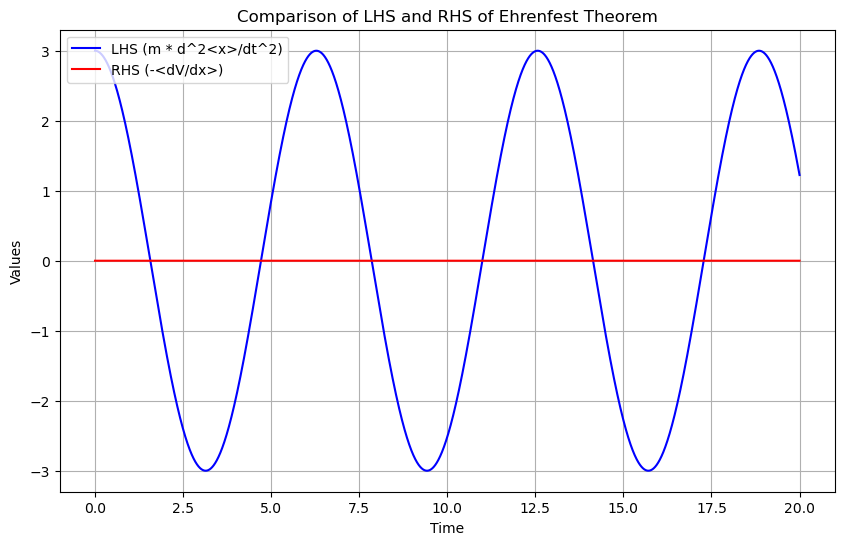

In [44]:
import numpy as np
from scipy import integrate

# Define the potential function
def V(x):
    return x**2 / 2

# Function to calculate the expectation value of position
def avg_x(x, psi):
    dx = x[1] - x[0]
    xPsi = x * psi
    return np.real(integrate.simps(psi.conjugate() * xPsi, x))

# Function to calculate the expectation value of momentum
def avg_P(x, R, I):
    dx = x[1] - x[0]
    dRdx = (1.0 / (12 * dx)) * (np.roll(R, -2) - 8 * np.roll(R, -1) + 8 * np.roll(R, 1) - np.roll(R, 2))
    dIdx = (1.0 / (12 * dx)) * (np.roll(I, -2) - 8 * np.roll(I, -1) + 8 * np.roll(I, 1) - np.roll(I, 2))
    return integrate.simps(R * dIdx - I * dRdx, x)

# Function to calculate the derivative of potential energy with respect to position
def derivative_V(x):
    return x

# Parameters and initial wavefunction setup
# (You can modify these parameters as needed)
xa = -10.
xb = 10.
sigma = 0.5
x0 = -3
k0 = 0
dx = 0.04
x = np.arange(xa, xb + dx, dx)
Vx = V(x)
psi0 = 1. / np.sqrt(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - x0)**2 / (4. * sigma**2.) + 1j * k0 * x)
R = np.real(psi0)
I = np.imag(psi0)

# Time parameters
dt = 0.5 * (dx**2)
Nt = 25000

# Initialize arrays to store the expectation values
avg_position = np.zeros(Nt)
avg_momentum = np.zeros(Nt)
derivative_V_avg = np.zeros(Nt)

# Perform the time evolution
for i in range(Nt):
    I_half = I + dIdt(R, Vx, dx) * (dt / 2.)
    R = R + dRdt(I_half, Vx, dx) * dt
    I = I_half + dIdt(R, Vx, dx) * (dt / 2.)
    wavefunction = R + 1j * I
    avg_position[i] = avg_x(x, wavefunction)
    avg_momentum[i] = avg_P(x, R, I)
    derivative_V_avg[i] = -np.mean(derivative_V(x))
print(avg_momentum)
# Calculate the left-hand side (LHS) of the Ehrenfest theorem
lhs = -np.gradient(avg_momentum, dt, edge_order=2)

# Calculate the right-hand side (RHS) of the Ehrenfest theorem
rhs = derivative_V_avg

# Plot the results for comparison
import matplotlib.pyplot as plt

time_points = np.linspace(0, Nt * dt, Nt)

plt.figure(figsize=(10, 6))
plt.plot(time_points, lhs, label='LHS (m * d^2<x>/dt^2)', color='blue')
plt.plot(time_points, rhs, label='RHS (-<dV/dx>)', color='red')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Comparison of LHS and RHS of Ehrenfest Theorem')
plt.grid(True)
plt.show()


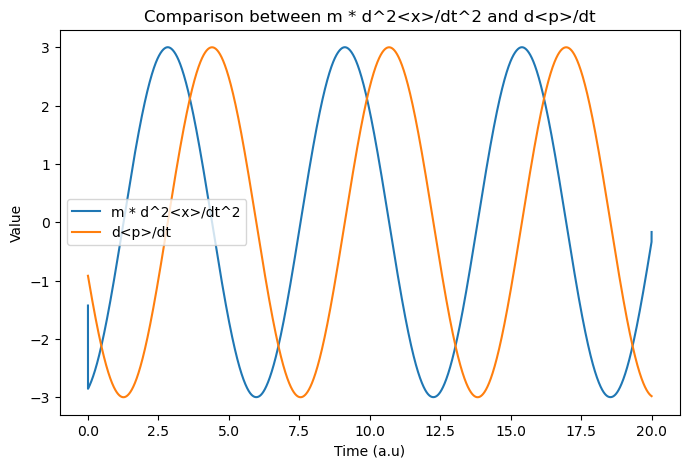

In [128]:
# Differentiating the expectation value of momentum with respect to time numerically
dpdt = np.gradient(average_position, time_points)
m=1.0
# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(time_points, (1/m)*np.gradient(np.gradient(average_position, time_points), time_points), label='m * d^2<x>/dt^2')
plt.plot(time_points, dpdt, label='d<p>/dt')
plt.xlabel('Time (a.u)')
plt.ylabel('Value')
plt.legend()
plt.title('Comparison between m * d^2<x>/dt^2 and d<p>/dt')
plt.show()


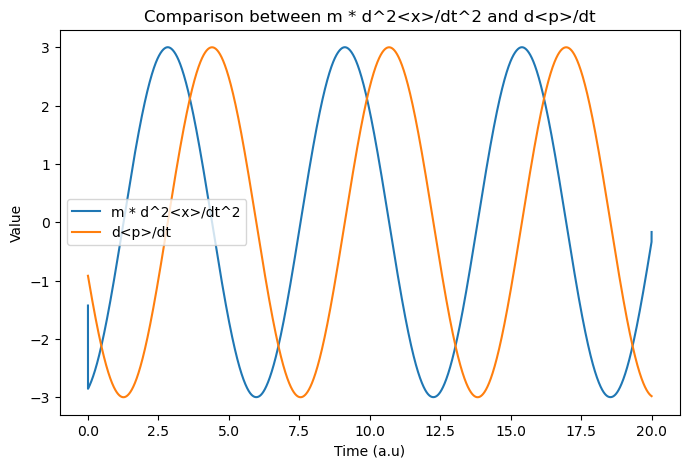

In [136]:
import numpy as np
from scipy import integrate

def avg_x(x, psi):
    dx = x[1] - x[0]
    xPsi = x * psi 
    return np.real(integrate.simps(psi.conjugate() * xPsi, x))

# Function to calculate the expectation value of momentum
def avg_P(x, R, I):
    dx = x[1] - x[0]
    dRdx = (1.0 / (12 * dx)) * (np.roll(R, -2) - 8 * np.roll(R, -1) + 8 * np.roll(R, 1) - np.roll(R, 2))
    dIdx = (1.0 / (12 * dx)) * (np.roll(I, -2) - 8 * np.roll(I, -1) + 8 * np.roll(I, 1) - np.roll(I, 2))
    return integrate.simps(R * dIdx - I * dRdx, x)
# Parameters and initial wavefunction setup
# (You can modify these parameters as needed)
xa = -10.
xb = 10.
sigma = 0.5
x0 = -3
k0 = 0
dx = 0.04
x = np.arange(xa, xb + dx, dx)
Vx = V(x)
psi0 = 1. / np.sqrt(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - x0)**2 / (4. * sigma**2.) + 1j * k0 * x)
R = np.real(psi0)
I = np.imag(psi0)

# Time parameters
dt = 0.5 * (dx**2)
Nt = 25000

# Initialize arrays to store the expectation values
avg_position = np.zeros(Nt)
avg_momentum = np.zeros(Nt)
# Differentiating the expectation value of momentum with respect to time numerically
dpdt = np.gradient(average_position , time_points)
m=1.0
# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(time_points, (1/m)*np.gradient(np.gradient(average_position , time_points), time_points), label='m * d^2<x>/dt^2')
plt.plot(time_points, dpdt, label='d<p>/dt')
plt.xlabel('Time (a.u)')
plt.ylabel('Value')
plt.legend()
plt.title('Comparison between m * d^2<x>/dt^2 and d<p>/dt')
plt.show()

In [43]:
def time_derivative(f, dt):
    return np.gradient(f, dt, axis=-1)[2:-2]

def second_time_derivative(f, dt):
    df_dt = np.gradient(f, dt, axis=-1)        # Compute first derivative along the last axis (time axis)
    d2f_dt2 = np.gradient(df_dt, dt, axis=-1)  # Compute second derivative along the last axis (time axis)
    return d2f_dt2[2:-2]

def position_derivative(f, dx):
    df_dx = -((np.roll(f, 1) - np.roll(f, -1)) / (2 * dx))
    return df_dx  # Omit first and last two terms

dvdx = position_derivative(Vx, dx)
avg_dvdx = np.zeros(Nt)

avgP = np.zeros(Nt)
t = np.linspace(0, 2, Nt)

for i in range(Nt):
    avgP[i] = avg_P(x, np.real(psi_all[i, :]), np.imag(psi_all[i, :]))

for i in range(Nt):
    # print(f"Shape of psi_all[i, :]: {psi_all[i, :].shape}")
    # print(f"Shape of dvdx: {dvdx.shape}")
    avg_dvdx[i] = np.real(integrate.simps(psi_all[i, :].conjugate() * dvdx * psi_all[i, :], x))

LHS = second_time_derivative(avgX, dt)
RHS1 = time_derivative(avgP, dt)
RHS2 = -avg_dvdx

print(f"LHS = {LHS}")
print(f"RHS1 = {RHS1}")
print(f"RHS2 = {RHS2}")

plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
plt.plot(t[2:-2],LHS)
plt.title("LHS Vs Time(t)")

plt.subplot(3,1,2)
plt.plot(t[2:-2],RHS1)
plt.title("RHS1 Vs Time(t)")

plt.subplot(3,1,3)
plt.plot(t,RHS2)
plt.title("RHS2 Vs Time(t)")

plt.tight_layout(pad = 4.0)
plt.show()

NameError: name 'psi_all' is not defined

## Analytically proof of Ehrenfest's Theorem
We know that the expectation value of momentum is mass of the particle m multiplied by the time derivative of expectation value of position.
$<p>=m\frac{d<x>}{dt}=m\frac{d}{dt}\int_{-\infty}^{\infty}x |\psi|^2 dx= m\frac{d}{dt}\int_{-\infty}^{\infty}x \frac{d|\psi|^2}{dt} dx$

however, it is easily demonsrated that \
$\frac{d|\psi|^2}{dt}+\frac{dj}{dx}=0$\
Thus\
$<p>=-m\int_{-\infty}^{\infty}x \frac{dj}{dx} dx= m \int_{-\infty}^{\infty}j dx$\
Now
$<p>= -\frac{ih}{4\pi}\int_{-\infty}^{\infty}(\psi^*\frac{d\psi}{dx}-\frac{d\psi^*}{dx} \psi )dx= -i\frac{h}{2\pi}\int_{-\infty}^{\infty}\psi^*\frac{d\psi}{dx} dx$

Now we can write \
$<p>= m\frac{d<x>}{dt}=-i\frac{h}{2\pi}\int_{-\infty}^{\infty}\psi^*\frac{d\psi}{dx} dx$

Now it follows from the previous equation that\
$\frac{d<p>}{dt}=-i\frac{h}{2\pi}\int_{-\infty}^{\infty}[\frac{d\psi^*}{dt}\frac{d\psi}{dx}+\psi^* \frac{d^2\psi}{dt dx}]dx$\
After integrating by parts and subsitituting the from Schrodinger equation and simplyfying, we obtain
$$\frac{d<p>}{dt}=\int_{-\infty}^{\infty}V(x) \frac{d|\psi|^2}{dx} dx$$

Integration by parts yields
 $$\frac{d<p>}{dt}=-\int_{-\infty}^{\infty}\frac{dV}{dx}|\psi|^2 dx =- <\frac{dV}{dx}>$$
 So we can write that\
 $$ m\frac{d<x>}{dt}=<P>$$
 $$\frac{d<p>}{dt}=-<\frac{dV}{dx}>$$
 
 
 So we numerically proved that 
 $$m\frac{d^2<x>}{dt^2}=\frac{d<p>}{dt}=-<\frac{dV}{dx}>$$



$$\text{Left term} = m \frac{d^2 \langle x \rangle}{dt^2} \quad \text{Right term 1} = \frac{d \langle p \rangle}{dt} \quad \text{Right term 2} = - \langle \frac{dV}{dx} \rangle$$